In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 89% 132M/149M [00:00<00:00, 127MB/s]
100% 149M/149M [00:01<00:00, 144MB/s]


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/content/Training'
test_dir = '/content/Testing'

batch_size = 32
img_height = 300
img_width = 300

train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=13,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=3,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_dataset.class_names
train_dataset = train_dataset.cache().shuffle(1024).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


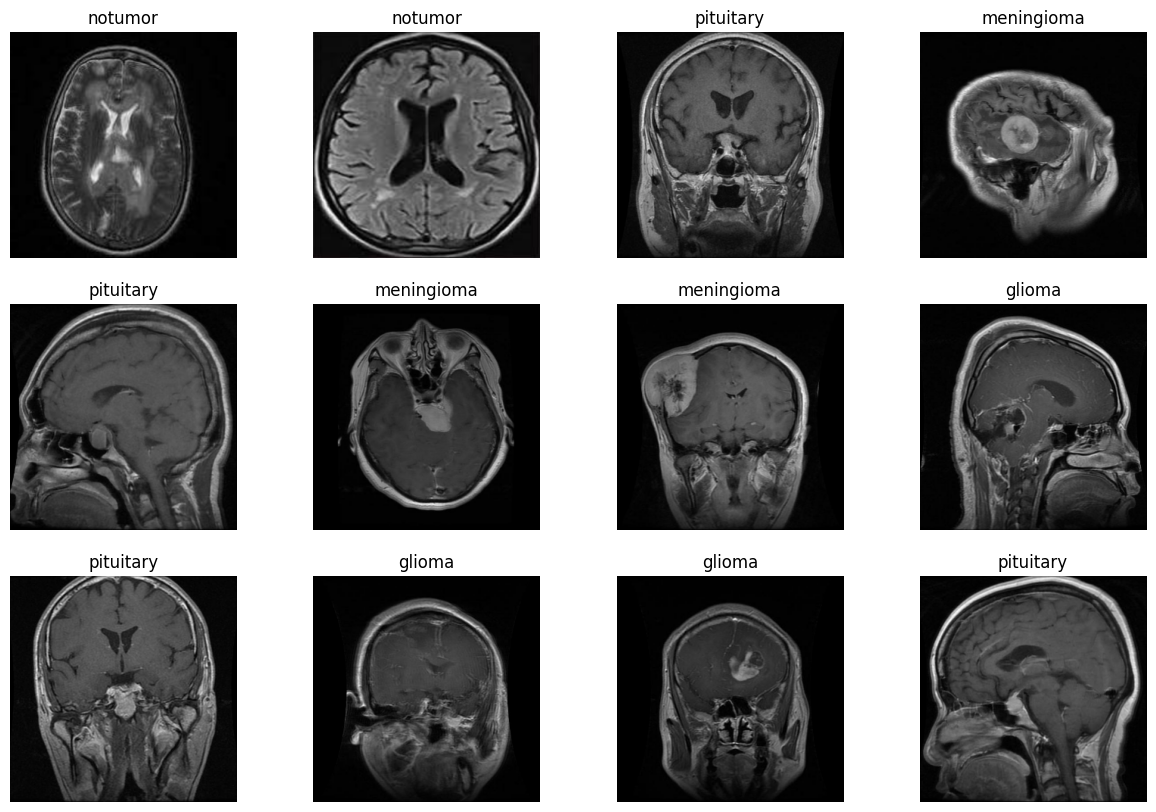

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15, 10))
for images, labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


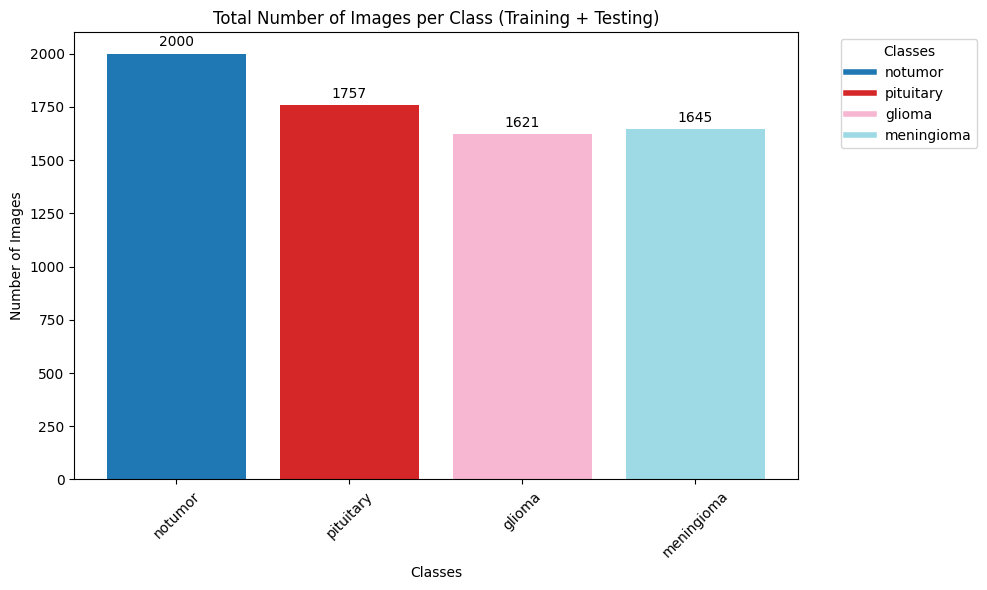

Total Number of Images per Class (Training + Testing):
notumor: 2000
pituitary: 1757
glioma: 1621
meningioma: 1645
Total Number of Images in Training Set: 5712
Total Number of Images in Testing Set: 1311


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define paths to your training and testing directories
train_dir = '/content/Training'
test_dir = '/content/Testing'

# Function to count number of images in each class folder
def count_images_in_classes(directory):
    classes = os.listdir(directory)
    class_counts = {}
    total_images = 0
    for cls in classes:
        class_path = os.path.join(directory, cls)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[cls] = num_images
            total_images += num_images
    return class_counts, total_images

# Count images in training set
train_class_counts, train_total = count_images_in_classes(train_dir)

# Count images in testing set
test_class_counts, test_total = count_images_in_classes(test_dir)

# Combine counts from training and testing sets
total_class_counts = {}
for cls in train_class_counts:
    total_class_counts[cls] = train_class_counts[cls] + test_class_counts.get(cls, 0)

# Create a colormap
colors = cm.get_cmap('tab20', len(total_class_counts))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(total_class_counts.keys(), total_class_counts.values(), color=[colors(i) for i in range(len(total_class_counts))])

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20, int(yval), ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class (Training + Testing)')
plt.xticks(rotation=45)

# Create a custom legend
legend_labels = total_class_counts.keys()
legend_colors = [colors(i) for i in range(len(total_class_counts))]
custom_legend = [plt.Line2D([0], [0], color=legend_colors[i], lw=4) for i in range(len(legend_labels))]
plt.legend(custom_legend, legend_labels, title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print total number of images in each class
print("Total Number of Images per Class (Training + Testing):")
for cls, count in total_class_counts.items():
    print(f"{cls}: {count}")

# Print total number of images in training and testing sets
print(f"Total Number of Images in Training Set: {train_total}")
print(f"Total Number of Images in Testing Set: {test_total}")


In [ ]:
pip install nvidia-smi

  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=7fd133f93e3505da01fe5edb476f2ba6f6d633a3b35388977ed5e22e3b1fafbc
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
!nvidia-smi  # this should display information about available GPUs

Tue Jul  2 12:44:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Directories
train_dir = '/content/Training'
test_dir = '/content/Testing'

# Data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=vgg_preprocess,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=vgg_preprocess)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

def build_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    base_model.trainable = False
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_vgg19_model():
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    base_model.trainable = False
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_inception_model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    base_model.trainable = False
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Found 0 images belonging to 4 classes.


In [ ]:

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 0 images belonging to 4 classes.


In [ ]:
def evaluate_model(model, test_generator):
    test_generator.reset()
    predictions = model.predict(test_generator)
    predicted_classes = np. (predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    cm = confusion_matrix(true_classes, predicted_classes)

    return report, cm



In [ ]:
vgg19_model = build_vgg19_model()

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
history = vgg19_model.fit(
        train_generator,
        epochs=50,
        validation_data=test_generator)


Epoch 1/50
179/179 [==============================] - 104s 522ms/step - loss: 2.0493 - accuracy: 0.6541 - val_loss: 0.6800 - val_accuracy: 0.7567
Epoch 2/50
179/179 [==============================] - 85s 474ms/step - loss: 0.6992 - accuracy: 0.7486 - val_loss: 0.4642 - val_accuracy: 0.8215
Epoch 3/50
179/179 [==============================] - 87s 486ms/step - loss: 0.6055 - accuracy: 0.7826 - val_loss: 0.4258 - val_accuracy: 0.8276
Epoch 4/50
179/179 [==============================] - 85s 475ms/step - loss: 0.5482 - accuracy: 0.7903 - val_loss: 0.4244 - val_accuracy: 0.8413
Epoch 5/50
179/179 [==============================] - 89s 499ms/step - loss: 0.4925 - accuracy: 0.8155 - val_loss: 0.3856 - val_accuracy: 0.8436
Epoch 6/50
179/179 [==============================] - 90s 502ms/step - loss: 0.4561 - accuracy: 0.8298 - val_loss: 0.3852 - val_accuracy: 0.8459
Epoch 7/50
179/179 [==============================] - 87s 485ms/step - loss: 0.4463 - accuracy: 0.8349 - val_loss: 0.3565 - val_a

In [ ]:
# Evaluate models
vgg16_report, vgg16_cm = evaluate_model(vgg19_model, test_generator)

In [ ]:

cnn_model = build_cnn_model()
inception_model = build_inception_model()

vgg16_history = train_model(vgg16_model, train_generator, test_generator, 'vgg16_model')
vgg19_history = train_model(vgg19_model, train_generator, test_generator, 'vgg19_model')
cnn_history = train_model(cnn_model, train_generator, test_generator, 'cnn_model')
inception_history = train_model(inception_model, train_generator, test_generator, 'inception_model')


In [ ]:

vgg19_report, vgg19_cm = evaluate_model(vgg19_model, test_generator)
cnn_report, cnn_cm = evaluate_model(cnn_model, test_generator)
inception_report, inception_cm = evaluate_model(inception_model, test_generator)
